<a href="https://colab.research.google.com/github/sarthakkaushik/Diploma-Program-in-ML-and-AI/blob/main/Image_classification_using_ANN_vs_CNN_vs_VGG16_architecture_on_CIFAR10_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#Loading the data set

In [5]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [6]:
 print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
 

X_train shape (50000, 32, 32, 3)
X_test shape (10000, 32, 32, 3)


In [7]:
 print('y_train shape',y_train.shape)
 print('y_test shape',y_test.shape)
 

y_train shape (50000, 1)
y_test shape (10000, 1)


In [8]:
y_train[:5] # its a 2D array, for classification it would be easy to operate on 1d array, hence we will convert it in 1D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
y_train=y_train.reshape(-1,) #-1 beacuse if we dont want to change the 1st dimension, 2nd dim we want to flatten it hence we will leave it blank
print(y_train[:5])
y_test=y_test.reshape(-1,)
print(y_test[:5])

[6 9 9 4 1]
[3 8 8 0 6]


In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

#Plotting some of the images

In [11]:
def plotsample(X,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

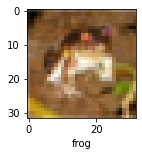

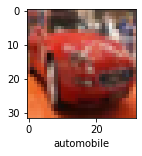

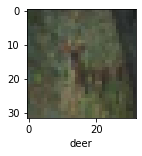

In [12]:
plotsample(X_train,y_train,0)
plotsample(X_train,y_train,5)
plotsample(X_train,y_train,10)


Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

**Normalizing the training data**

In [13]:
X_train=X_train/255.0
X_test=X_test/255.0

**Case I:** Build artificial Neural Netwok

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(1000, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])


In [15]:
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )

In [16]:
ann.fit(X_train,y_train,epochs=10,verbose=2,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 - 10s - loss: 1.8667 - accuracy: 0.3264 - val_loss: 1.7257 - val_accuracy: 0.3730 - 10s/epoch - 7ms/step
Epoch 2/10
1563/1563 - 7s - loss: 1.6600 - accuracy: 0.4062 - val_loss: 1.6690 - val_accuracy: 0.4026 - 7s/epoch - 5ms/step
Epoch 3/10
1563/1563 - 7s - loss: 1.5762 - accuracy: 0.4346 - val_loss: 1.5921 - val_accuracy: 0.4404 - 7s/epoch - 5ms/step
Epoch 4/10
1563/1563 - 7s - loss: 1.5234 - accuracy: 0.4533 - val_loss: 1.5229 - val_accuracy: 0.4646 - 7s/epoch - 5ms/step
Epoch 5/10
1563/1563 - 7s - loss: 1.4881 - accuracy: 0.4688 - val_loss: 1.5084 - val_accuracy: 0.4742 - 7s/epoch - 5ms/step
Epoch 6/10
1563/1563 - 8s - loss: 1.4566 - accuracy: 0.4785 - val_loss: 1.5108 - val_accuracy: 0.4663 - 8s/epoch - 5ms/step
Epoch 7/10
1563/1563 - 7s - loss: 1.4273 - accuracy: 0.4872 - val_loss: 1.4702 - val_accuracy: 0.4739 - 7s/epoch - 5ms/step
Epoch 8/10
1563/1563 - 7s - loss: 1.4050 - accuracy: 0.4951 - val_loss: 1.5199 - val_accuracy: 0.4574 - 7s/epoch - 5ms/step
Epoch 

In [17]:
score=ann.evaluate(X_test,y_test,verbose=0)
print('Test Loss', score[0])
print('Train Loss', score[1])


Test Loss 1.5136494636535645
Train Loss 0.46160000562667847


**You can see that at the end of 10 epochs, accuracy is at around 47%**

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(elements) for elements in y_pred]

print('Classification Report: \n', classification_report(y_test,y_pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.52      0.54      1000
           1       0.49      0.73      0.59      1000
           2       0.31      0.49      0.38      1000
           3       0.41      0.16      0.23      1000
           4       0.42      0.35      0.38      1000
           5       0.37      0.49      0.42      1000
           6       0.42      0.63      0.50      1000
           7       0.75      0.31      0.44      1000
           8       0.59      0.63      0.61      1000
           9       0.63      0.32      0.43      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



**Case-2 :** Lets see the CNN performance on Image data

In [19]:
cnn=models.Sequential([
                       
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
                       layers.MaxPooling2D((2,2)),

                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
                       layers.MaxPooling2D((2,2)),
                       layers.Dropout(0.25),

                       layers.Flatten(),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )

In [21]:
cnn.fit(X_train,y_train,epochs=10,verbose=2,validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 - 36s - loss: 1.5392 - accuracy: 0.4438 - val_loss: 1.2612 - val_accuracy: 0.5446 - 36s/epoch - 23ms/step
Epoch 2/10
1563/1563 - 8s - loss: 1.2412 - accuracy: 0.5611 - val_loss: 1.1119 - val_accuracy: 0.6129 - 8s/epoch - 5ms/step
Epoch 3/10
1563/1563 - 8s - loss: 1.1179 - accuracy: 0.6066 - val_loss: 1.0544 - val_accuracy: 0.6319 - 8s/epoch - 5ms/step
Epoch 4/10
1563/1563 - 8s - loss: 1.0270 - accuracy: 0.6394 - val_loss: 0.9828 - val_accuracy: 0.6577 - 8s/epoch - 5ms/step
Epoch 5/10
1563/1563 - 8s - loss: 0.9737 - accuracy: 0.6603 - val_loss: 0.9577 - val_accuracy: 0.6729 - 8s/epoch - 5ms/step
Epoch 6/10
1563/1563 - 8s - loss: 0.9253 - accuracy: 0.6760 - val_loss: 0.9128 - val_accuracy: 0.6799 - 8s/epoch - 5ms/step
Epoch 7/10
1563/1563 - 8s - loss: 0.8905 - accuracy: 0.6886 - val_loss: 0.8944 - val_accuracy: 0.6949 - 8s/epoch - 5ms/step
Epoch 8/10
1563/1563 - 8s - loss: 0.8559 - accuracy: 0.7004 - val_loss: 0.9284 - val_accuracy: 0.6836 - 8s/epoch - 5ms/step
Epoch

In [22]:
score=ann.evaluate(X_test,y_test,verbose=0)
print('Test Loss', score[0])
print('Train Loss', score[1])


Test Loss 1.5136494636535645
Train Loss 0.46160000562667847


In [23]:
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(elements) for elements in y_pred]

print('Classification Report: \n', classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.52      0.54      1000
           1       0.49      0.73      0.59      1000
           2       0.31      0.49      0.38      1000
           3       0.41      0.16      0.23      1000
           4       0.42      0.35      0.38      1000
           5       0.37      0.49      0.42      1000
           6       0.42      0.63      0.50      1000
           7       0.75      0.31      0.44      1000
           8       0.59      0.63      0.61      1000
           9       0.63      0.32      0.43      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



#Using Tranfer Learning : VGG16

553476096/553467096 [==============================] - 6s 0us/step


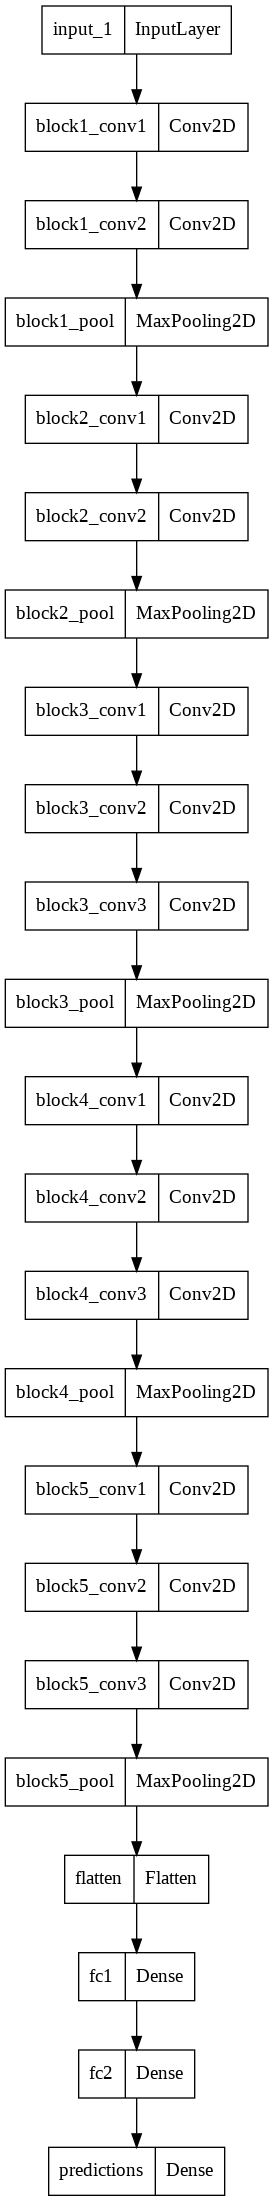

In [24]:
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import  plot_model
model = VGG16()
plot_model(model)

In [25]:
# VGG-16 model summary
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

The following code section will cut the VGG model after the final convolutional layer:

In [26]:
base_model_VGG16=VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))

58900480/58889256 [==============================] - 1s 0us/step


In [27]:
base_model_VGG16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [28]:
#create vectore representation for our data using VGG16
X_train_vgg_output=base_model_VGG16.predict(X_train,verbose=2)
X_test_vgg_output=base_model_VGG16.predict(X_test,verbose=2)


1563/1563 - 23s - 23s/epoch - 15ms/step
313/313 - 4s - 4s/epoch - 14ms/step


In [31]:
print ('shape of X_train_vegg_output: ',X_train_vgg_output.shape)
print ('shape of X_test_vegg_output: ',X_test_vgg_output.shape)

shape of X_train_vegg_output:  (50000, 1, 1, 512)
shape of X_test_vegg_output:  (10000, 1, 1, 512)


In [34]:
X_train[0].shape

(32, 32, 3)

In [41]:
X_test_vgg_output[0].shape

(1, 1, 512)

In [47]:
#Flatten the output
X_train_new_1 = np.reshape(X_train_vgg_output,(50000,1*1*512))
X_test_new_1=np.reshape(X_test_vgg_output,(10000,512))
print('New shape train:', X_train_new_1.shape)
print('New_shape_test',X_test_new_1.shape)




New shape train: (50000, 512)
New_shape_test (10000, 512)


In [57]:
#Lets train a new ann model on our output feature form VGG16
ann_new_model2 = models.Sequential([
        # layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(1000, activation='relu', input_dim=1*1*512),
        layers.Dropout(0.5),
        layers.Dense(500, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

In [58]:
ann_new_model2.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
            )

In [59]:
history=ann_new_model2.fit(X_train_new_1,y_train,epochs=20,verbose=2,validation_data=(X_test_new_1,y_test))

Epoch 1/20
1563/1563 - 7s - loss: 1.4312 - accuracy: 0.4951 - val_loss: 1.2568 - val_accuracy: 0.5571 - 7s/epoch - 4ms/step
Epoch 2/20
1563/1563 - 6s - loss: 1.2757 - accuracy: 0.5505 - val_loss: 1.2253 - val_accuracy: 0.5692 - 6s/epoch - 4ms/step
Epoch 3/20
1563/1563 - 6s - loss: 1.2236 - accuracy: 0.5697 - val_loss: 1.1869 - val_accuracy: 0.5853 - 6s/epoch - 4ms/step
Epoch 4/20
1563/1563 - 6s - loss: 1.1832 - accuracy: 0.5834 - val_loss: 1.1657 - val_accuracy: 0.5896 - 6s/epoch - 4ms/step
Epoch 5/20
1563/1563 - 6s - loss: 1.1570 - accuracy: 0.5933 - val_loss: 1.1515 - val_accuracy: 0.6027 - 6s/epoch - 4ms/step
Epoch 6/20
1563/1563 - 6s - loss: 1.1246 - accuracy: 0.6028 - val_loss: 1.1551 - val_accuracy: 0.5973 - 6s/epoch - 4ms/step
Epoch 7/20
1563/1563 - 6s - loss: 1.1025 - accuracy: 0.6110 - val_loss: 1.1191 - val_accuracy: 0.6055 - 6s/epoch - 4ms/step
Epoch 8/20
1563/1563 - 6s - loss: 1.0798 - accuracy: 0.6173 - val_loss: 1.1241 - val_accuracy: 0.6081 - 6s/epoch - 4ms/step
Epoch 9/

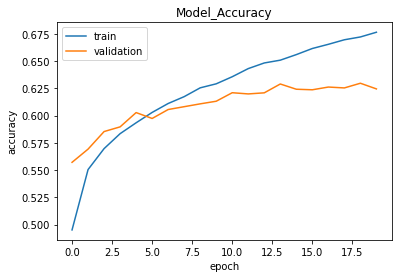

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='upper left')
plt.show()
